In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings('ignore') #Importing the necessary libraries

In [2]:
Train=pd.read_excel("TrainSet.xlsx") #Checking the training dataset

In [3]:
Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
Train.columns #Checking the total columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
Train.info() #Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# All are object data type except the target variable

In [7]:
Train.describe() # To check the dataset

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
# There is a wide difference in mean and standard deviation in price
# The difference between minimum and maximum value for price is also wide

In [9]:
Train.shape # Checking the row and column

(10683, 11)

In [10]:
Train.isnull().sum() # To check if there is any null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
# there is one null value in Route and Total Stops, hence it can be dropped

In [12]:
Train.dropna(inplace=True) #dropping NaN

In [13]:
Train.isnull().sum() # To check if the null still exists

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
Train[Train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [15]:
# As there are different airlines as well as different routes hence not removing any duplicate values

In [16]:
Train['Airline'].unique() # Checking the different kind of airlines

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [17]:
Train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [18]:
Train['Source'].unique() 

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [19]:
Train['Source'].value_counts() 

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [20]:
Train['Destination'].unique() 

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [21]:
Train['Destination'].value_counts() 

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [22]:
Train['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [23]:
Train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
Train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [25]:
Train['Total_Stops'].unique() 

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [26]:
Train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
# From the above observations the following things can be concluded:
#1. Jet Airways have the maximum availability.
#2. Majority of the planes leave from Delhi followed by Kolkata.
#3. The majority destination has been Cochin followed by Banglore
#4. Majority has no info as its additional information.
#5. Maximum plane is a one stop destination.

In [28]:
Test=pd.read_excel("Test_set.xlsx") #Checking the testing dataset

In [29]:
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [30]:
Test.columns #Checking the total columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [31]:
Test.info() #Checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [32]:
Test.describe() # To check the test dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [33]:
Test.isnull().sum() #checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

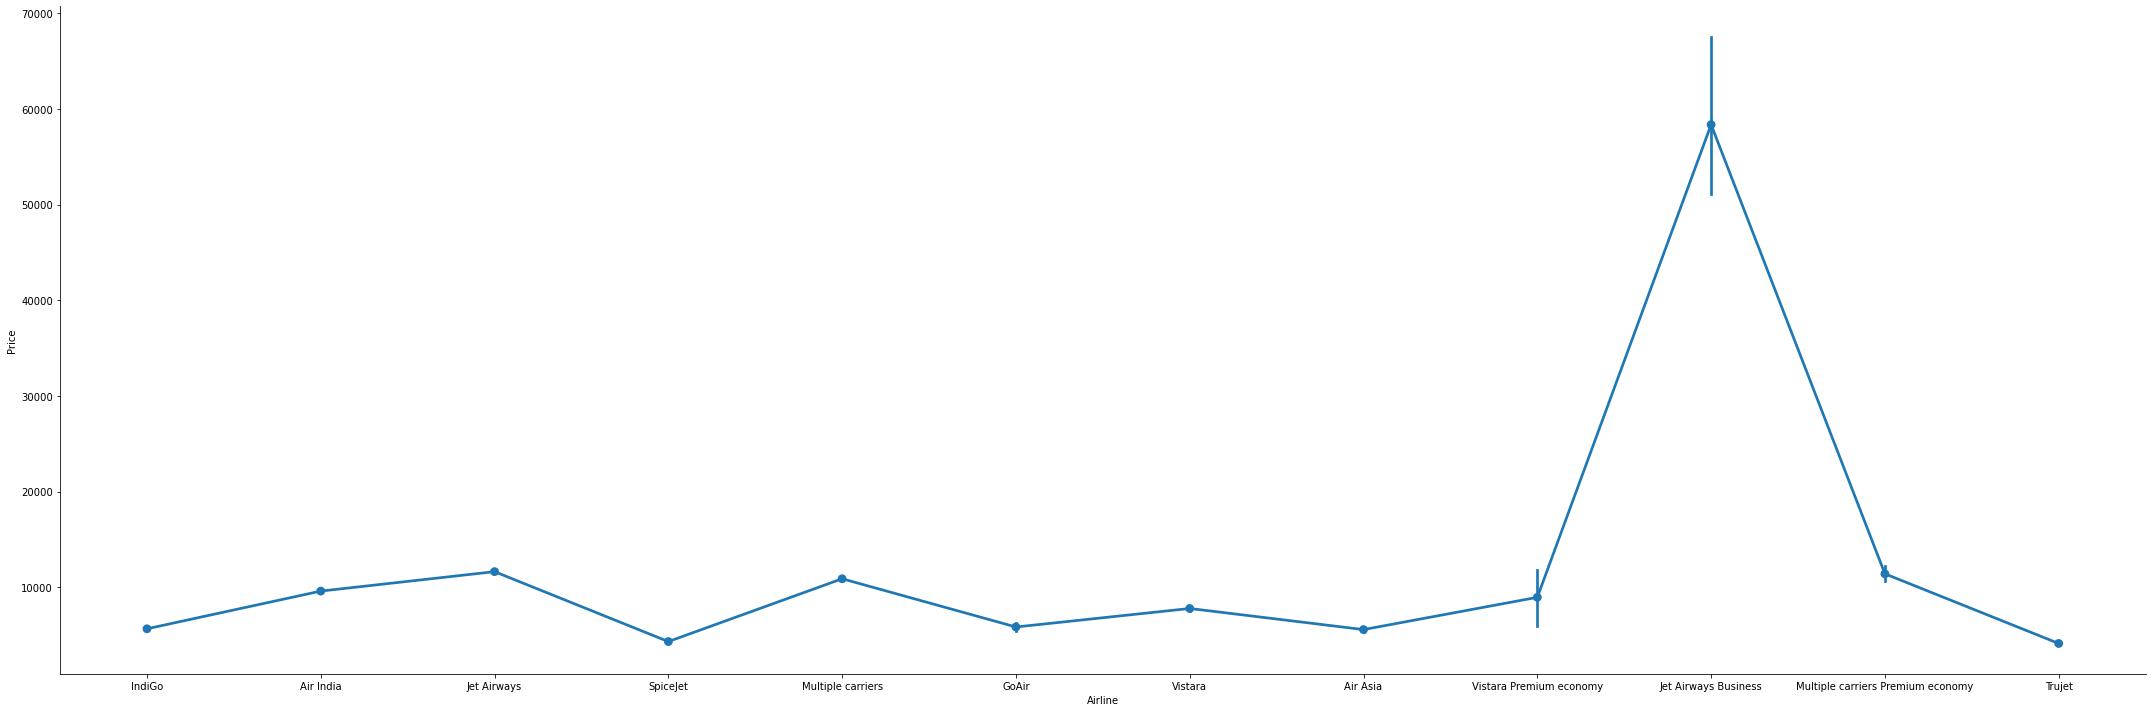

In [34]:
sns.catplot(y='Price',x='Airline',data=Train,kind='point',height=10,aspect=3) # Checking the relationship between price and airlines

In [35]:
# Jet Airways has the highest price along with the highest outlier

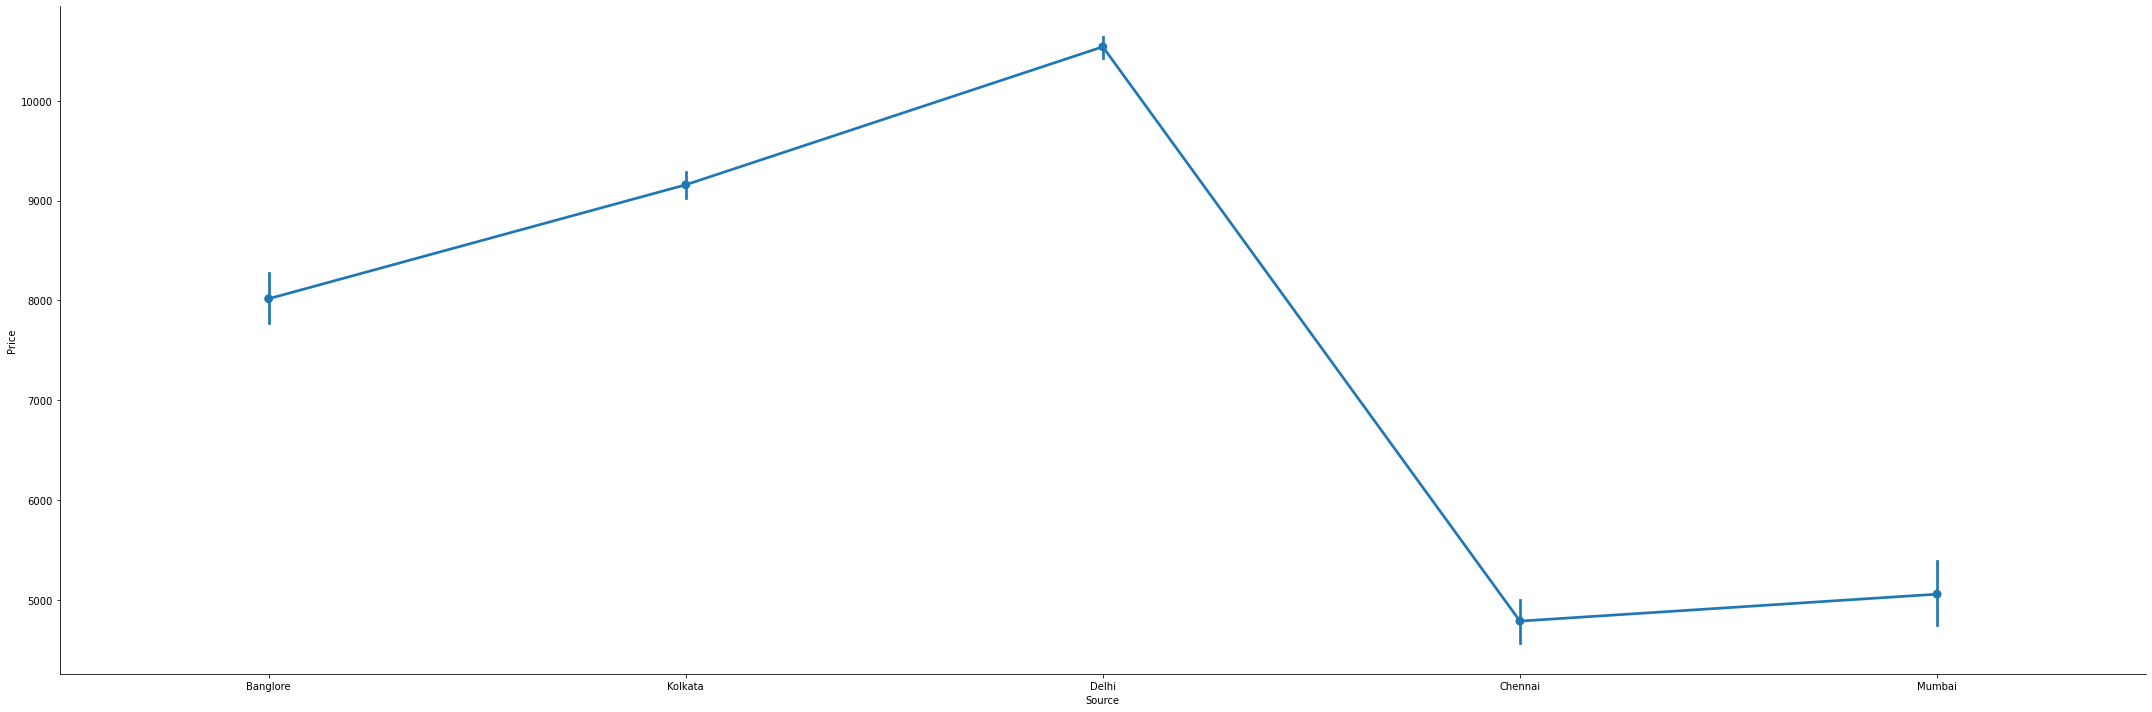

In [36]:
sns.catplot(y='Price',x='Source',data=Train,kind='point',height=10,aspect=3) # Checking the relationship between price and airlines

In [37]:
# Price is higher for Delhi and also has outliers in Bangalore, Chennai, Mumbai with least outlier in Delhi and Kolkata

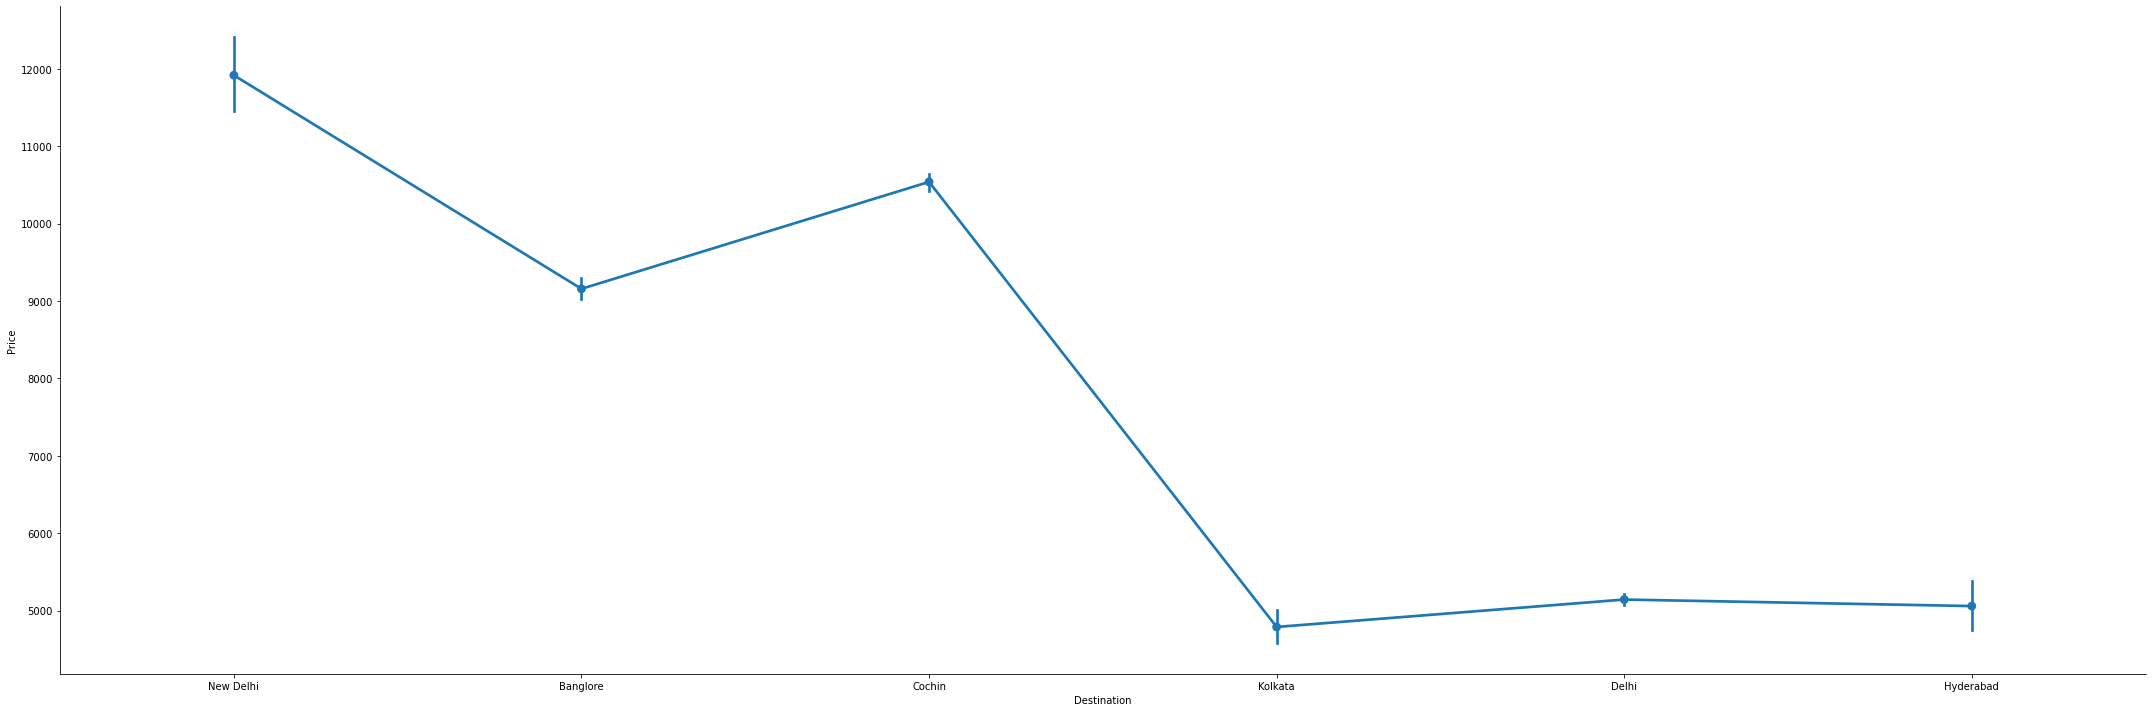

In [38]:
sns.catplot(y='Price',x='Destination',data=Train,kind='point',height=10,aspect=3) # Checking the relationship between price and airlines

In [39]:
#Price for New Delhi has the most outliers while for Cochin has the least

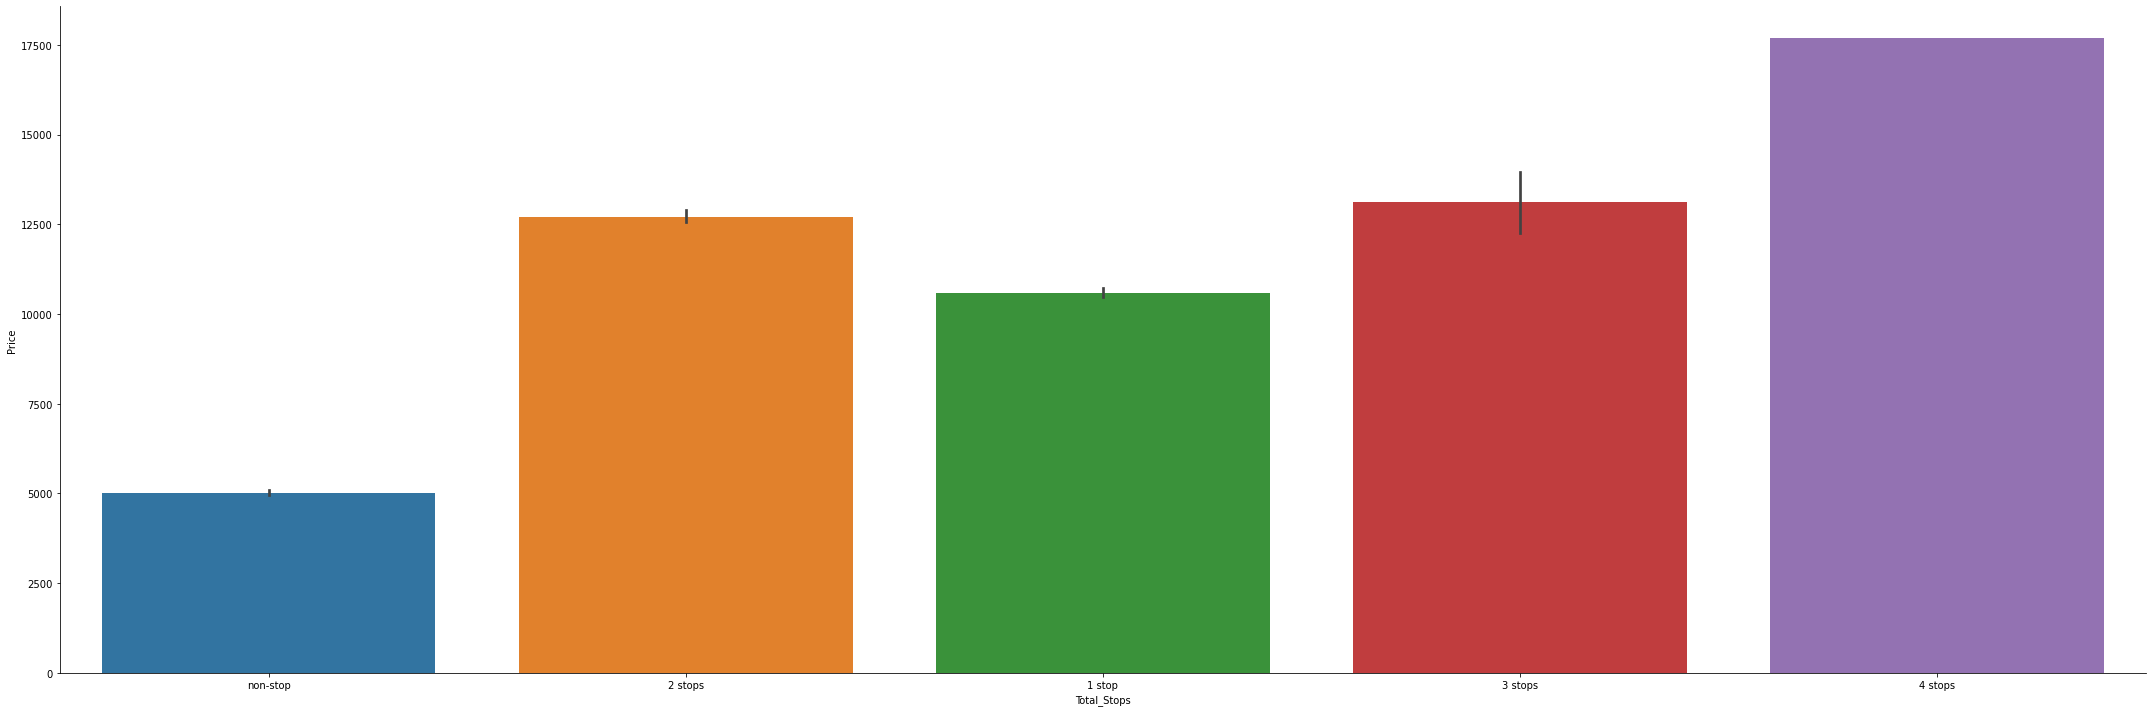

In [40]:
sns.catplot(y='Price',x='Total_Stops',data=Train,kind='bar',height=10,aspect=3) # Checking the relationship between price and airlines

In [41]:
# Prices ranges high when there is 4 stops involved and there is an Outlier present along with 3 stops

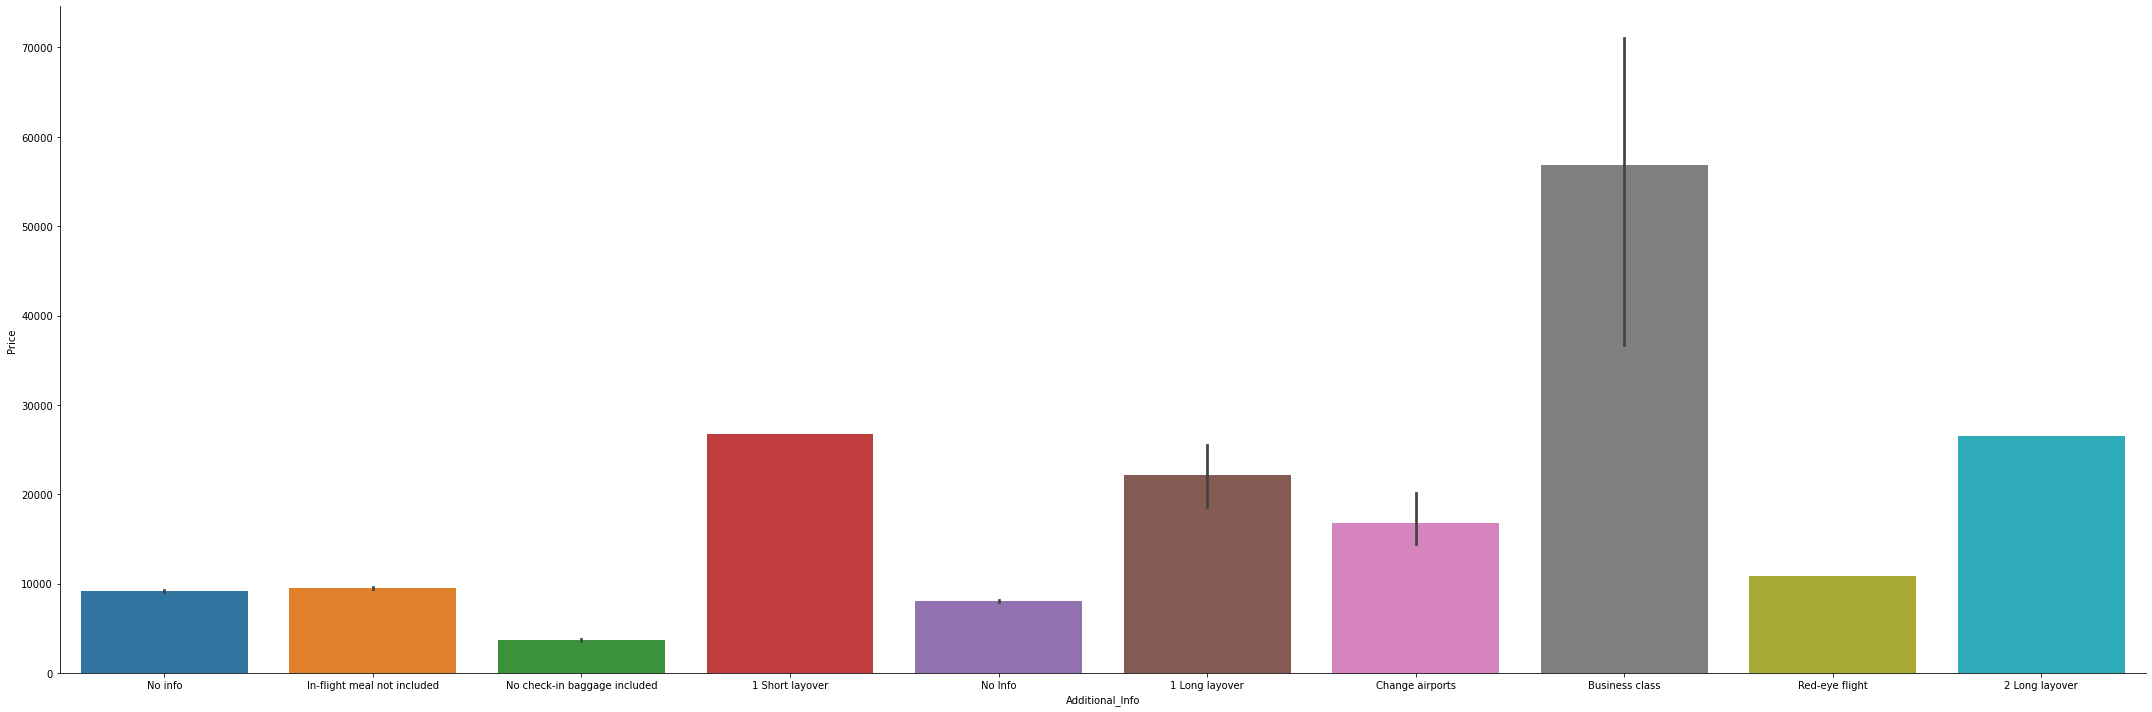

In [42]:
sns.catplot(y='Price',x='Additional_Info',data=Train,kind='bar',height=10,aspect=3) # Checking the relationship between price and airlines

In [43]:
# Price is again high along with Outliers being present in Business Class as well as 1 long layover

In [44]:
Train.head () #Checking the training set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [45]:
enc= LabelEncoder() #Encoding the object data type

In [46]:
columns=['Airline','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Date_of_Journey']
Train[columns] = Train[columns].apply(enc.fit_transform) #Encoding the object data type into int data type

In [47]:
Train.head () #Checking the training set after encoding

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302


In [48]:
columns=['Airline','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Date_of_Journey']
Test[columns] = Train[columns].apply(enc.fit_transform) #Encoding the object data type into int data type in test data set

In [49]:
Test.head () #Checking the test set after encoding

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,233,240,4,8
1,1,6,3,0,84,31,906,336,1,8
2,4,43,2,1,118,70,413,106,1,8
3,3,10,3,0,91,164,1324,311,0,8
4,3,0,0,5,29,149,1237,303,0,8


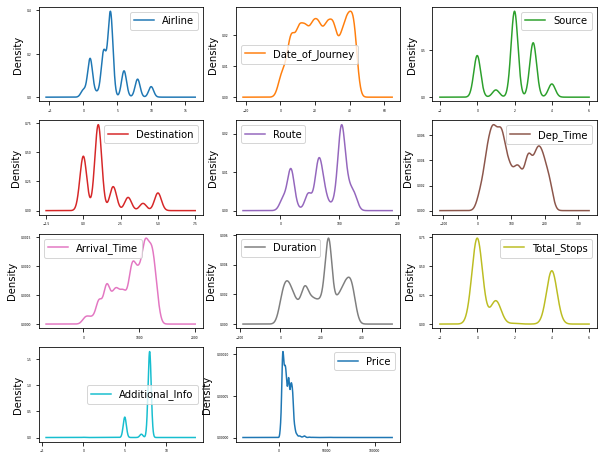

In [50]:
Train.plot(kind='kde',subplots=True,layout=(4,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [51]:
Train.skew().sort_values(ascending=False) #checking the skewness

Price              1.812405
Destination        1.244046
Airline            0.731057
Total_Stops        0.631532
Dep_Time           0.194914
Date_of_Journey   -0.070718
Duration          -0.213498
Source            -0.424023
Route             -0.501911
Arrival_Time      -0.606676
Additional_Info   -1.779689
dtype: float64

In [52]:
# Slight skewness is observed in almost all the columns apart from Dep_Time., Date of Journey, Duration, Source and Route

In [53]:
from sklearn.preprocessing import power_transform

In [54]:
New_Train=power_transform(Train)

In [55]:
pd.DataFrame(New_Train,columns=Train.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

Total_Stops        0.325086
Destination        0.041570
Price             -0.012108
Airline           -0.015281
Dep_Time          -0.150814
Date_of_Journey   -0.228702
Source            -0.238295
Arrival_Time      -0.381687
Duration          -0.390739
Route             -0.442919
Additional_Info   -1.371943
dtype: float64

In [56]:
Train=pd.DataFrame(New_Train,columns=Train.columns)

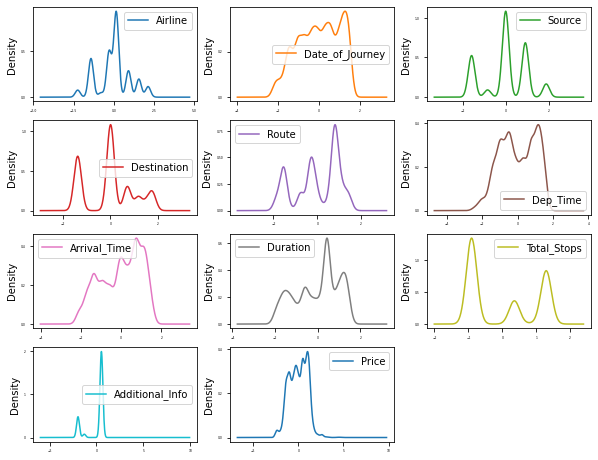

In [57]:
Train.plot(kind='kde',subplots=True,layout=(4,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [58]:
X= Train.drop('Price',axis=1)
Y= Train['Price'] #dividing the feature and target variable

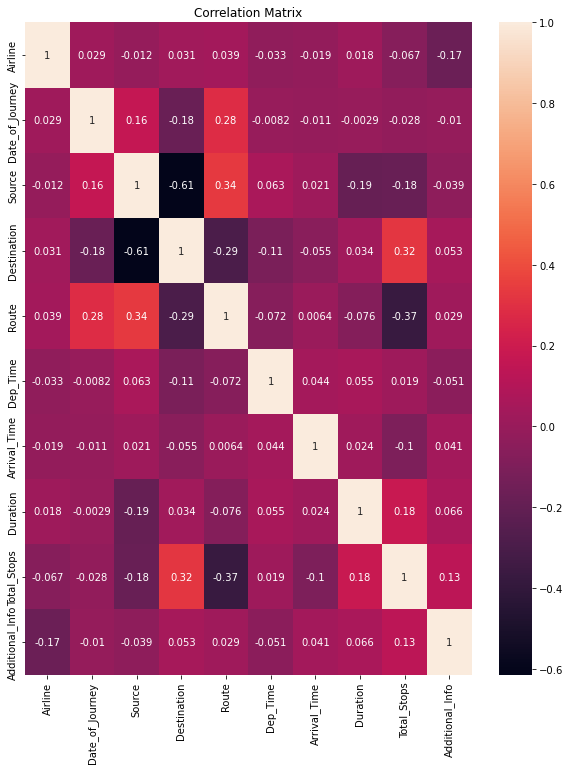

In [59]:
corr_mat=X.corr()
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [60]:
# There is not much corellation found from the heat map hence trying with VIF

In [61]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Airline,1.040120
1,Date_of_Journey,1.115158
2,Source,1.783563
3,Destination,1.819108
4,Route,1.393620
5,Dep_Time,1.034406
6,Arrival_Time,1.019930
7,Duration,1.099959
8,Total_Stops,1.352893
9,Additional_Info,1.064411


In [62]:
# There is no multicolinearity issue

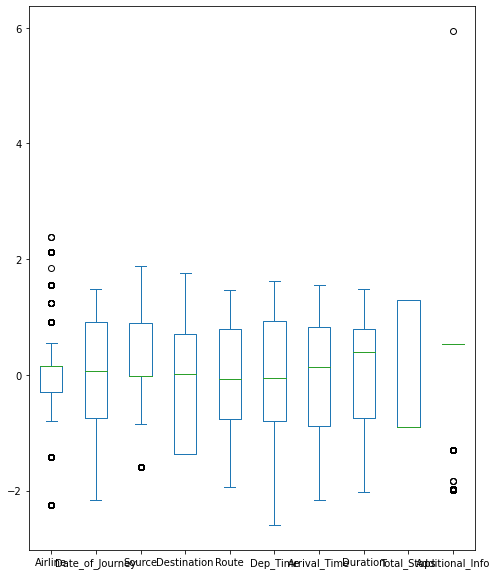

In [63]:
X.plot(kind='box',figsize=(8,10),layout=(4,3))
plt.show() #checking for oultiers

In [64]:
# Additional Info has Outliers which goes above zcore 3

In [65]:
from scipy.stats import zscore

In [66]:
(np.abs(zscore(X)<3)).all()

Airline             True
Date_of_Journey     True
Source              True
Destination         True
Route               True
Dep_Time            True
Arrival_Time        True
Duration            True
Total_Stops         True
Additional_Info    False
dtype: bool

In [67]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X))>3)
index

(array([8122], dtype=int64), array([9], dtype=int64))

In [68]:
New_X = X[(np.abs(zscore(X))<3).all(axis=1)]
New_X

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,-0.295676,0.072966,-1.599652,1.752627,-1.533484,1.502311,-1.795790,0.459827,1.293519,0.524734
1,-1.420475,-1.481458,0.902015,-1.370478,0.230611,-1.354199,0.041865,1.239696,0.355429,0.524734
2,0.147591,1.484970,-0.012096,0.005859,1.199748,-0.511704,-1.384215,-0.746538,0.355429,0.524734
3,-0.295676,-1.102000,0.902015,-1.370478,0.427760,0.922569,1.487985,1.041293,-0.905811,0.524734
4,-0.295676,-2.157314,-1.599652,1.752627,-1.256599,0.723258,1.172391,0.977164,-0.905811,0.524734
...,...,...,...,...,...,...,...,...,...,...
10677,-2.244258,1.342587,0.902015,-1.370478,-0.324503,1.164375,1.251518,0.426156,1.293519,0.524734
10678,-1.420475,0.459273,0.902015,-1.370478,-0.324503,1.287403,1.418454,0.434584,1.293519,0.524734
10679,0.147591,0.459273,-1.599652,0.707019,-1.533484,-0.743378,-0.219132,0.790942,1.293519,0.524734
10680,2.122962,-2.157314,-1.599652,1.752627,-1.533484,-0.126215,0.145914,0.443005,1.293519,0.524734


In [69]:
Y_new=Y.drop(index[0],axis=0)
Y_new  #removing the outliers from target variables

0       -1.367854
1       -0.138984
2        1.086164
3       -0.536300
4        0.993291
           ...   
10677   -1.278242
10678   -1.262421
10679   -0.251324
10680    0.884591
10681    0.728284
Name: Price, Length: 10681, dtype: float64

In [70]:
New_X.shape # Checking the shape of X and Y after removing Outliers

(10681, 10)

In [71]:
Y_new.shape # Checking the shape of X and Y after removing Outliers

(10681,)

In [72]:
Scalar=StandardScaler()

In [73]:
X_Scaled=Scalar.fit_transform(New_X)
X_Scaled

array([[-0.29594157,  0.07277618, -1.59991876, ...,  0.459852  ,
         1.29368137,  0.5261364 ],
       [-1.42095339, -1.48191382,  0.90193135, ...,  1.23969236,
         0.35556096,  0.5261364 ],
       [ 0.14740887,  1.48502235, -0.01224654, ..., -0.7464677 ,
         0.35556096,  0.5261364 ],
       ...,
       [ 0.14740887,  0.45914935, -1.59991876, ...,  0.79095455,
         1.29368137,  0.5261364 ],
       [ 2.12315268, -2.15788485, -1.59991876, ...,  0.44303072,
         1.29368137,  0.5261364 ],
       [-1.42095339,  1.41396964, -0.01224654, ...,  1.32607872,
         0.35556096,  0.5261364 ]])

# Ridge Regression

In [74]:
Ridge=Ridge()

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
Ridge.fit(X_train,y_train)
pred_test=Ridge.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 35.09009046694743


# Lasso Regression

In [76]:
Lasso=Lasso()

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
Lasso.fit(X_train,y_train)
pred_test=Lasso.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: -0.35262359888030836


# Decision Tree Regressor

In [78]:
DT= DecisionTreeRegressor()

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 84.7968408197315


# Random Forest Regressor

In [80]:
RF= RandomForestRegressor()

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 90.38974969566375


# Cross Validation for Ridge

In [82]:
for i in range(2,6):
    Rid_Val=cross_val_score(Ridge,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",Rid_Val.mean()*100)

The cross validation score for 2 is 36.41297993610883
The cross validation score for 3 is 36.440780595360884
The cross validation score for 4 is 36.471021559975824
The cross validation score for 5 is 36.447192535600614


# Cross Validation for Lasso

In [83]:
for i in range(2,6):
    Lass_Val=cross_val_score(Lasso,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",Lass_Val.mean()*100)

The cross validation score for 2 is -0.04526257744866813
The cross validation score for 3 is -0.04194944013629076
The cross validation score for 4 is -0.030724526419317888
The cross validation score for 5 is -0.06410540477462146


# Cross Validation for Decision Tree Regressor

In [84]:
for i in range(2,6):
    DT_Val=cross_val_score(DT,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",DT_Val.mean()*100)

The cross validation score for 2 is 83.14999873566421
The cross validation score for 3 is 84.42114225828631
The cross validation score for 4 is 86.03129624543004
The cross validation score for 5 is 86.47354198029085


# Cross Validation for Random Forest Regressor

In [85]:
for i in range(2,6):
    RF_Val=cross_val_score(RF,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is 89.70740584318035
The cross validation score for 3 is 90.36426342661393
The cross validation score for 4 is 91.04527197368586
The cross validation score for 5 is 91.27607482912104


In [86]:
x=PrettyTable()
x.field_names=['Model Name','R_score','Cross Validation Score']
x.add_row(['Ridge Regression','35.09','36.44'])
x.add_row(['Lasso Regression','-0.35','-0.06'])
x.add_row(['Decision Tree Regressor','84.79','86.43'])
x.add_row(['Random Tree Regressor','90.38','91.27'])

print(x)

+-------------------------+---------+------------------------+
|        Model Name       | R_score | Cross Validation Score |
+-------------------------+---------+------------------------+
|     Ridge Regression    |  35.09  |         36.44          |
|     Lasso Regression    |  -0.35  |         -0.06          |
| Decision Tree Regressor |  84.79  |         86.43          |
|  Random Tree Regressor  |  90.38  |         91.27          |
+-------------------------+---------+------------------------+


## Therefore looking at the pretty table it can be said that Random Tree Regressor is the best model for this dataset 

# Hypertuning Parameters

In [87]:
RFC=RandomForestRegressor()

In [88]:
parameters={'max_depth':(list(range(10,11))),'min_samples_split':(list(range(4,5))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(RFC,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [4]})

In [89]:
clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [90]:
RFC=RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4)

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [92]:
RFC_Score=r2_score(y_test,pred_test)*100
RFC_Score

86.80364035792405

In [110]:
RFC=RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=4)

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [112]:
RFC_Score=r2_score(y_test,pred_test)*100
RFC_Score

90.1577115449815

## It seems that the initial score before hyper tuning gave the maximum value, therefore the initial score for random forest classifier will be taken

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test)


print('R-Squared value for Random Forest:',r2_score(y_test,pred_test)*100)


R-Squared value for Random Forest: 90.21969838042997


# Saving the model

In [116]:
import pickle
filename='Flight Price Prediction.pkl'
pickle.dump(RF,open(filename,'wb'))